# 06. Transfer Learning with TensorFlow Part 3: Scaling up (🍔👁 Food Vision mini)

**Scaling Up with Transfer Learning**

In this notebook, we'll take our transfer learning experiments to the next level by using more data. We'll scale up from 10 classes to all classes in the Food101 dataset.

**Our Goal**

Beat the original Food101 paper's results using only 10% of the data.

**What We'll Cover**

1. Downloading and preparing 10% of the Food101 data
2. Training a feature extraction transfer learning model
3. Fine-tuning the model
4. Saving and loading the trained model
5. Evaluating the model's performance
6. Making predictions on custom images of food

**How to Use This Notebook**

1. Read through the descriptions and code
2. Write the code yourself in a new notebook to get hands-on experience
3. Investigate and experiment with the code to learn more


In [ ]:
!pip install tf_keras

In [1]:
# 1!pip install tensorflow==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 40.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [ ]:
 # !pip install -U -q tensorflow==2.9.0

In [4]:
!wget https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/helper/helper.py

# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


--2024-09-14 04:13:33--  https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/helper/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9565 (9.3K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   9.34K  --.-KB/s    in 0s      

2024-09-14 04:13:33 (70.0 MB/s) - ‘helper.py.2’ saved [9565/9565]



In [12]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [6]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2024-09-14 04:24:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  23.3MB/s    in 81s     

2024-09-14 04:25:51 (19.3 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [13]:
# How many images/classes are there?
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pulled_pork_sandwich'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/red_velvet_cake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/nachos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/eggs_benedict'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/crab_cakes'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/sashimi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheesecake'.
There are 0 directories and 250 image

In [14]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [15]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [16]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [17]:
len(train_data_all_10_percent.class_names), train_data_all_10_percent.class_names

(101,
 ['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  

In [18]:
# Setup the base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model(x, training=False) # put the base model in inference mode so weights which need to stay frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
# Get a summary of model we've created
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_avg_pool_layer                │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [20]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [21]:
# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 940s 4s/step - accuracy: 0.1296 - loss: 4.0707 - val_accuracy: 0.3980 - val_loss: 2.7489
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 985s 4s/step - accuracy: 0.4058 - loss: 2.6148 - val_accuracy: 0.4298 - val_loss: 2.3021
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 969s 4s/step - accuracy: 0.4732 - loss: 2.2079 - val_accuracy: 0.5397 - val_loss: 1.8699
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 928s 4s/step - accuracy: 0.5170 - loss: 2.0011 - val_accuracy: 0.5373 - val_loss: 1.8427
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 965s 4s/step - accuracy: 0.5524 - loss: 1.8210 - val_accuracy: 0.5953 - val_loss: 1.6266


In [22]:
# Evaluate on the whole test dataset
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

790/790 ━━━━━━━━━━━━━━━━━━━━ 1861s 2s/step - accuracy: 0.5091 - loss: 1.9160


[1.800980806350708, 0.538891077041626]

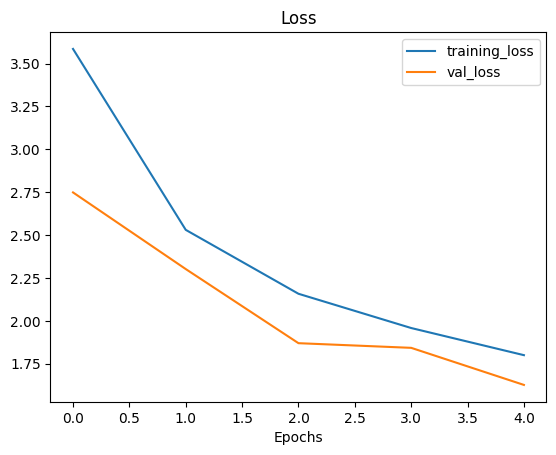

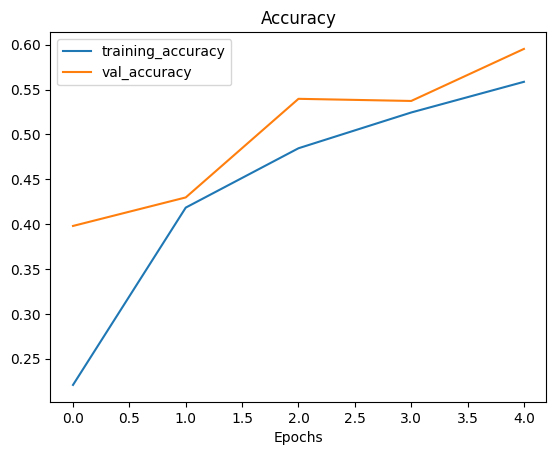

In [24]:
plot_loss_curves(history_all_classes_10_percent)

## Fine-tuning

In [25]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [26]:
# Recompile model with lower learning (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate lowered by 10x
              metrics=["accuracy"])

In [27]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [ ]:
# # Check which layers are trainable in our base model
# for layer_number, layer in enumerate(model.layers[2].layers):
#   print(layer_number, layer.name, layer.trainable)

In [28]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 971s 4s/step - accuracy: 0.5596 - loss: 1.7990 - val_accuracy: 0.5013 - val_loss: 1.9564
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 916s 4s/step - accuracy: 0.6050 - loss: 1.6140 - val_accuracy: 0.5207 - val_loss: 1.8052
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 922s 4s/step - accuracy: 0.6178 - loss: 1.5356 - val_accuracy: 0.6001 - val_loss: 1.5620
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 924s 4s/step - accuracy: 0.6462 - loss: 1.4312 - val_accuracy: 0.5659 - val_loss: 1.6735
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 918s 4s/step - accuracy: 0.6586 - loss: 1.3598 - val_accuracy: 0.6242 - val_loss: 1.4449
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 932s 4s/step - accuracy: 0.6715 - loss: 1.3144 - val_accuracy: 0.6086 - val_loss: 1.4210


In [29]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 ━━━━━━━━━━━━━━━━━━━━ 1857s 2s/step - accuracy: 0.5537 - loss: 1.6923


[1.603456735610962, 0.5762772560119629]

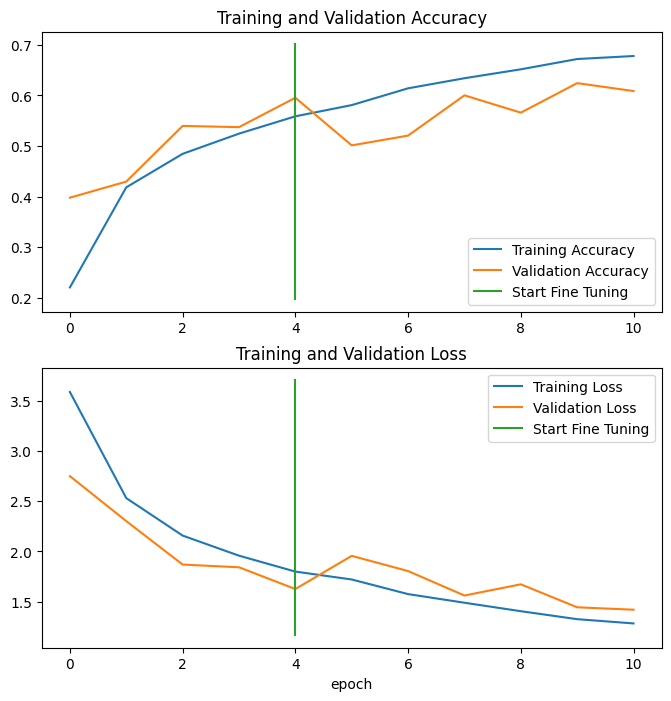

In [30]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [39]:
# Save our fine-tuning model

model.save("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/models/101_food_classes_10_percent_saved_big_model.keras")
print("Saved model to disk")

Saved model to disk


In [41]:
# Load an evaluate saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/models/101_food_classes_10_percent_saved_big_model.keras")

In [42]:
# Evaluate loaded model and compare performance to pre-saved model
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 ━━━━━━━━━━━━━━━━━━━━ 1840s 2s/step - accuracy: 0.5297 - loss: 1.7997


[1.6721889972686768, 0.5579406023025513]

In [43]:
# The results from our loaded_model (above) should be very similar to the results below
results_all_classes_10_percent_fine_tune

[1.603456735610962, 0.5762772560119629]

## Evaluating the performance of the big dog model across all different classes

Let's make some predictions, visualize them and then later find out which predictions were the "most" wrong.

In [13]:
# !pip install tf_keras
# !pip install tensorflow==2.9.0

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.0 MB/s eta 0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorboard-data-server
    Found exist

In [1]:
# import tensorflow as tf

# # Download pretrained model (one that was prepared earlier, so all predictions are similar)
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

# !wget https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/helper/helper.py

--2024-09-14 04:22:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 74.125.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’

06_101_food_class_1 100%[===================>]  44.59M  19.0MB/s    in 2.3s    

2024-09-14 04:22:56 (19.0 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’ saved [46760742/46760742]

--2024-09-14 04:22:56--  https://raw.githubusercontent.com/siddhant-rajhans/TensorFlow/main/Basics/helper/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.c

In [2]:
# # Import series of helper functions for the notebook (we've created/used these in previous notebooks)
# from helper import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [3]:
# unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

In [4]:
# # # Load in saved model
# import tf_keras as keras

# #model = keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model/")
# # Load an evaluate saved model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_classification/Project/Multiclass image classification/models/101_food_classes_10_percent_saved_big_dog_model.h5")

In [44]:
# # Evaluate loaded model (the one we just downloaded on test data)
# results_downloaded_model = model.evaluate(test_data)
# results_downloaded_model

In [59]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = loaded_model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 ━━━━━━━━━━━━━━━━━━━━ 1923s 2s/step - accuracy: 0.5297 - loss: 1.7997


(1.6721889972686768, 0.5579406023025513)

In [46]:
# Make predictions with model
preds_probs = loaded_model.predict(test_data, verbose=1) # set verbosity to see how long is left

790/790 ━━━━━━━━━━━━━━━━━━━━ 1939s 2s/step


In [47]:
len(test_data)

790

In [48]:
# How many predictions are there?
len(preds_probs)

25250

In [49]:
# What's the shape of our predictions?
preds_probs.shape

(25250, 101)

In [50]:
# Let's see what the first 10 predictions look like
preds_probs[:10]

array([[1.78962141e-01, 3.93062318e-03, 4.76259999e-02, ...,
        9.39830279e-05, 1.89785322e-03, 1.05454922e-02],
       [9.51794446e-01, 1.90440846e-06, 1.35870185e-04, ...,
        2.16366933e-03, 9.67401661e-07, 8.84008205e-06],
       [4.55780715e-01, 1.22537892e-02, 4.63063968e-03, ...,
        3.59880272e-03, 1.92592910e-04, 3.77225201e-03],
       ...,
       [2.69745082e-01, 1.04534329e-05, 1.02262141e-03, ...,
        1.49003044e-01, 1.85891535e-04, 1.67199731e-04],
       [8.94932896e-02, 2.29204958e-03, 1.13714198e-02, ...,
        1.34694984e-03, 1.90610808e-04, 5.62566915e-04],
       [4.73106951e-01, 3.28335045e-05, 1.25008065e-03, ...,
        1.04591865e-02, 6.42602708e-06, 1.48904847e-03]], dtype=float32)

In [51]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([1.78962141e-01, 3.93062318e-03, 4.76259999e-02, 1.54985810e-06,
        3.30241055e-05, 8.44768601e-06, 1.59618459e-04, 9.36037759e-05,
        8.28184746e-03, 5.63513022e-04, 1.50476853e-05, 3.36120793e-05,
        4.06606356e-03, 8.89923376e-06, 1.41340047e-02, 3.77554883e-04,
        6.99870798e-05, 1.05636625e-03, 9.35333257e-04, 1.16480933e-05,
        1.19455718e-03, 1.74912318e-04, 1.43037134e-04, 1.21931953e-03,
        5.50483892e-05, 2.78575975e-03, 3.35437781e-03, 1.24530081e-04,
        5.07023819e-02, 8.57166830e-04, 6.82032578e-06, 5.46745432e-04,
        7.64029246e-05, 4.43378267e-05, 1.99976470e-03, 9.10038725e-05,
        2.67695356e-03, 5.14521403e-03, 1.03527019e-02, 2.71429017e-05,
        8.12105209e-05, 3.67748132e-03, 2.47089472e-03, 7.30877582e-05,
        1.61212563e-04, 5.89352794e-06, 6.36905199e-04, 1.62208191e-04,
        8.72839701e-06, 3.86199206e-02, 5.83068281e-03, 9.60107645e-05,
        3.29161972e-01, 1.04936354e-01, 1.31233042e-04, 2.283046

In [52]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [1.78962141e-01 3.93062318e-03 4.76259999e-02 1.54985810e-06
 3.30241055e-05 8.44768601e-06 1.59618459e-04 9.36037759e-05
 8.28184746e-03 5.63513022e-04 1.50476853e-05 3.36120793e-05
 4.06606356e-03 8.89923376e-06 1.41340047e-02 3.77554883e-04
 6.99870798e-05 1.05636625e-03 9.35333257e-04 1.16480933e-05
 1.19455718e-03 1.74912318e-04 1.43037134e-04 1.21931953e-03
 5.50483892e-05 2.78575975e-03 3.35437781e-03 1.24530081e-04
 5.07023819e-02 8.57166830e-04 6.82032578e-06 5.46745432e-04
 7.64029246e-05 4.43378267e-05 1.99976470e-03 9.10038725e-05
 2.67695356e-03 5.14521403e-03 1.03527019e-02 2.71429017e-05
 8.12105209e-05 3.67748132e-03 2.47089472e-03 7.30877582e-05
 1.61212563e-04 5.89352794e-06 6.36905199e-04 1.62208191e-04
 8.72839701e-06 3.86199206e-02 5.83068281e-03 9.60107645e-05
 3.29161972e-01 1.04936354e-01 1.31233042e-04 2.28304695e-02
 2.81015132e-02 1.25721644e-03 1.26970664e-

In [53]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([52,  0,  0, 38,  8, 78, 29,  0,  9,  0])

In [55]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [56]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

25250

In [57]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.557940594059406

In [60]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 8.243145277475605e-09


In [61]:
# Note: Custom confusion matrix
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [62]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

101 class names and 25250 predictions and ground truth labels

In [63]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.28      0.21      0.24       250
           1       0.42      0.77      0.54       250
           2       0.83      0.33      0.47       250
           3       0.81      0.48      0.61       250
           4       0.45      0.54      0.49       250
           5       0.40      0.30      0.34       250
           6       0.81      0.61      0.69       250
           7       0.71      0.78      0.74       250
           8       0.35      0.35      0.35       250
           9       0.33      0.69      0.45       250
          10       0.36      0.43      0.40       250
          11       0.77      0.44      0.56       250
          12       0.75      0.53      0.62       250
          13       0.42      0.62      0.50       250
          14       0.58      0.47      0.52       250
          15       0.56      0.19      0.29       250
          16       0.75      0.42      0.54       250
          17       0.32    

The `classification_report()` outputs the precision, recall and f1-score's per class.

A reminder:
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
* **Recall** - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.

The above output is helpful but with so many classes, it's a bit hard to understand.

Let's see if we make it easier with the help of a visualization.

First, we'll get the output of `classification_report()` as a dictionary by setting `output_dict=True`.

In [65]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.27956989247311825,
  'recall': 0.208,
  'f1-score': 0.23853211009174313,
  'support': 250.0},
 '1': {'precision': 0.41865509761388287,
  'recall': 0.772,
  'f1-score': 0.5428973277074544,
  'support': 250.0},
 '2': {'precision': 0.8282828282828283,
  'recall': 0.328,
  'f1-score': 0.4699140401146132,
  'support': 250.0},
 '3': {'precision': 0.8120805369127517,
  'recall': 0.484,
  'f1-score': 0.606516290726817,
  'support': 250.0},
 '4': {'precision': 0.4470198675496689,
  'recall': 0.54,
  'f1-score': 0.48913043478260876,
  'support': 250.0},
 '5': {'precision': 0.40437158469945356,
  'recall': 0.296,
  'f1-score': 0.34180138568129326,
  'support': 250.0},
 '6': {'precision': 0.8085106382978723,
  'recall': 0.608,
  'f1-score': 0.6940639269406392,
  'support': 250.0},
 '7': {'precision': 0.7065217391304348,
  'recall': 0.78,
  'f1-score': 0.7414448669201522,
  'support': 250.0},
 '8': {'precision': 0.35080645161290325,
  'recall': 0.348,
  'f1-score': 0.349397590

In [66]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.23853211009174313,
 'baby_back_ribs': 0.5428973277074544,
 'baklava': 0.4699140401146132,
 'beef_carpaccio': 0.606516290726817,
 'beef_tartare': 0.48913043478260876,
 'beet_salad': 0.34180138568129326,
 'beignets': 0.6940639269406392,
 'bibimbap': 0.7414448669201522,
 'bread_pudding': 0.34939759036144574,
 'breakfast_burrito': 0.44935064935064933,
 'bruschetta': 0.3956043956043956,
 'caesar_salad': 0.557544757033248,
 'cannoli': 0.6182669789227166,
 'caprese_salad': 0.5008077544426494,
 'carrot_cake': 0.5221238938053097,
 'ceviche': 0.2865671641791045,
 'cheese_plate': 0.5408163265306122,
 'cheesecake': 0.38095238095238104,
 'chicken_curry': 0.46376811594202894,
 'chicken_quesadilla': 0.5942350332594236,
 'chicken_wings': 0.5695187165775402,
 'chocolate_cake': 0.5152224824355972,
 'chocolate_mousse': 0.25688073394495414,
 'churros': 0.7073684210526316,
 'clam_chowder': 0.6864197530864198,
 'club_sandwich': 0.6452991452991452,
 'crab_cakes': 0.38421955403087477,
 'creme_

In [67]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33              edamame  0.927103
32            dumplings  0.858947
91  spaghetti_carbonara  0.832392
86              sashimi  0.825263
75                  pho  0.820961

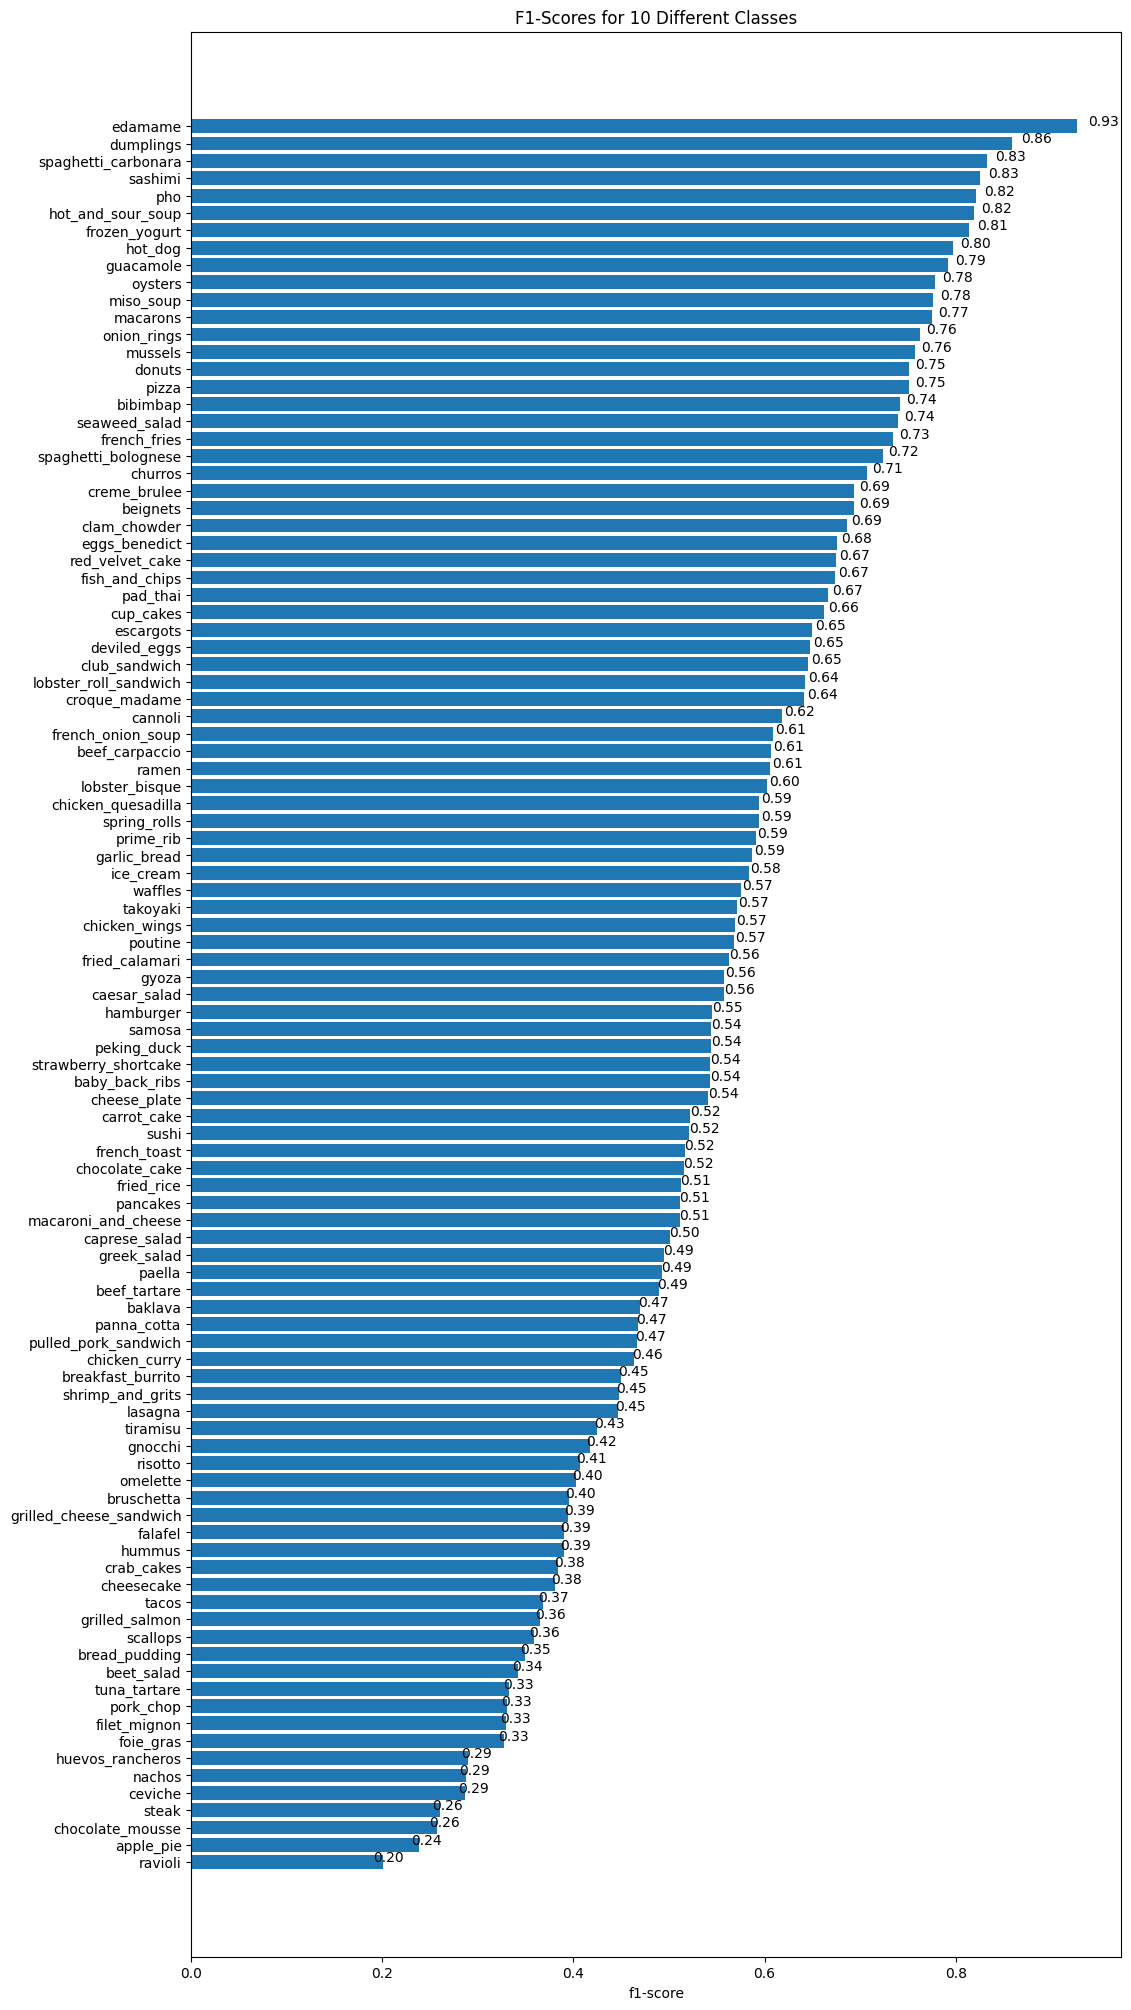

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [69]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


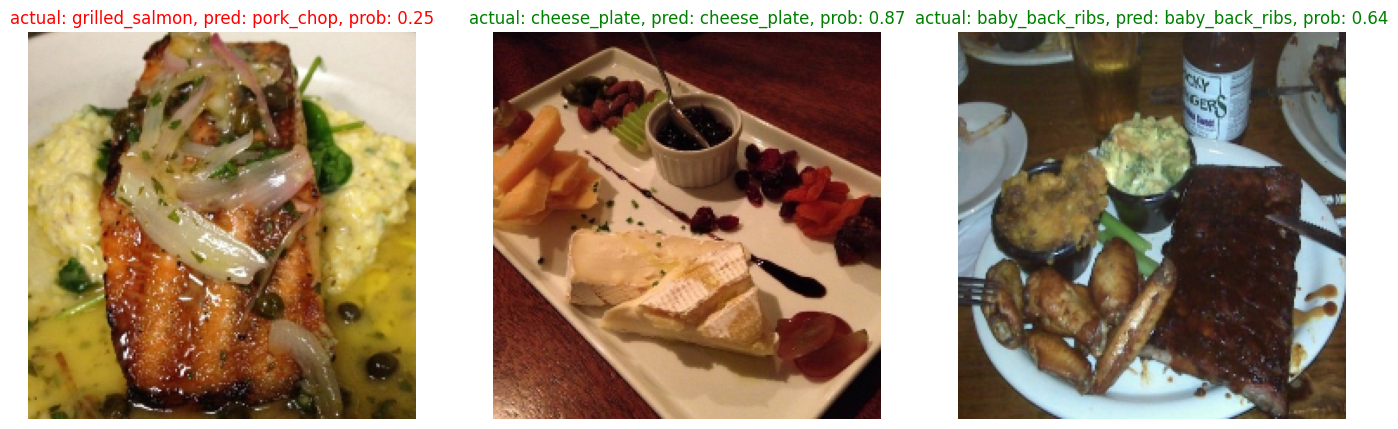

In [71]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

### Finding the most wrong predictions

It's a good idea to go through at least 100+ random instances of your model's predictions to get a good feel for how it's doing.

After a while you might notice the model predicting on some images with a very high prediction probability, meaning it's very confident with its prediction but still getting the label wrong.

These **most wrong** predictions can help to give further insight into your model's performance.

So how about we write some code to collect all of the predictions where the model has output a high prediction probability for an image (e.g. 0.95+) but gotten the prediction wrong.

We'll go through the following steps:
1. Get all of the image file paths in the test dataset using the [`list_files()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#list_files) method.
2. Create a pandas DataFrame of the image filepaths, ground truth labels, prediction classes, max prediction probabilities, ground truth class names and predicted class names.
  * **Note:** We don't necessarily have to create a DataFrame like this but it'll help us visualize things as we go.
3. Use our DataFrame to find all the wrong predictions (where the ground truth doesn't match the prediction).
4. Sort the DataFrame based on wrong predictions and highest max prediction probabilities.
5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [72]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

Now we've got all of the test image filepaths, let's combine them into a DataFrame along with:
* Their ground truth labels (`y_labels`).
* The class the model predicted (`pred_classes`).
* The maximum prediction probabilitity value (`pred_probs.max(axis=1)`).
* The ground truth class names.
* The predicted class names.

In [75]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": preds_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0      52   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0      38   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.329162        apple_pie            gyoza  
1   0.951794        apple_pie        apple_pie  
2   0.455781        apple_pie        apple_pie  
3   0.155211        apple_pie   fish_and_chips  
4   0.265012        apple_pie    bread_pudding

In [76]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0      52   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0      38   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.329162        apple_pie            gyoza         False  
1   0.951794        apple_pie        apple_pie          True  
2   0.455781        apple_pie        apple_pie          True  
3   0.155211        apple_pie   fish_and_chips         False  
4   0.265012        apple_pie    bread_pudding         False

In [77]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
23631  b'101_food_classes_10_percent/test/strawberry_...      94      83   
15124  b'101_food_classes_10_percent/test/lobster_bis...      60      27   
23797  b'101_food_classes_10_percent/test/sushi/16593...      95      86   
5652   b'101_food_classes_10_percent/test/chocolate_m...      22      98   
23539  b'101_food_classes_10_percent/test/strawberry_...      94      83   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72      67   
9202   b'101_food_classes_10_percent/test/falafel/390...      36      20   
14517  b'101_food_classes_10_percent/test/ice_cream/1...      58      45   
16209  b'101_food_classes_10_percent/test/miso_soup/5...      64      81   
22     b'101_food_classes_10_percent/test/apple_pie/1...       0     100   
11642  b'101_food_classes_10_percent/test/garlic_brea...      46      10   
15359  b'101_food_classes_10_percent/test/lobster_rol...      61      53   
14062  b'101_food_classes_10_percent/test/huevos_ranc...      56      28   
10847  b'101_food_classes_10_percent/test/fried_calam...      43      68   
5889   b'101_food_classes_10_percent/test/churros/309...      23      68   
14482  b'101_food_classes_10_percent/test/hummus/8476...      57      51   
6108   b'101_food_classes_10_percent/test/clam_chowde...      24      27   
17897  b'101_food_classes_10_percent/test/paella/2986...      71      65   
14572  b'101_food_classes_10_percent/test/ice_cream/2...      58      79   
10774  b'101_food_classes_10_percent/test/fried_calam...      43      68   

       pred_conf       y_true_classname y_pred_classname  pred_correct  
23631   0.998444   strawberry_shortcake  red_velvet_cake         False  
15124   0.997310         lobster_bisque     creme_brulee         False  
23797   0.995885                  sushi          sashimi         False  
5652    0.994469       chocolate_mousse         tiramisu         False  
23539   0.993009   strawberry_shortcake  red_velvet_cake         False  
18001   0.990364               pancakes         omelette         False  
9202    0.990073                falafel    chicken_wings         False  
14517   0.989306              ice_cream    frozen_yogurt         False  
16209   0.989038              miso_soup            ramen         False  
22      0.988589              apple_pie          waffles         False  
11642   0.988224           garlic_bread       bruschetta         False  
15359   0.987194  lobster_roll_sandwich        hamburger         False  
14062   0.986612       huevos_rancheros    croque_madame         False  
10847   0.986375         fried_calamari      onion_rings         False  
5889    0.985572                churros      onion_rings         False  
14482   0.984887                 hummus        guacamole         False  
6108    0.984410           clam_chowder     creme_brulee         False  
17897   0.983782                 paella          mussels         False  
14572   0.982209              ice_cream        prime_rib         False  
10774   0.981485         fried_calamari      onion_rings         False

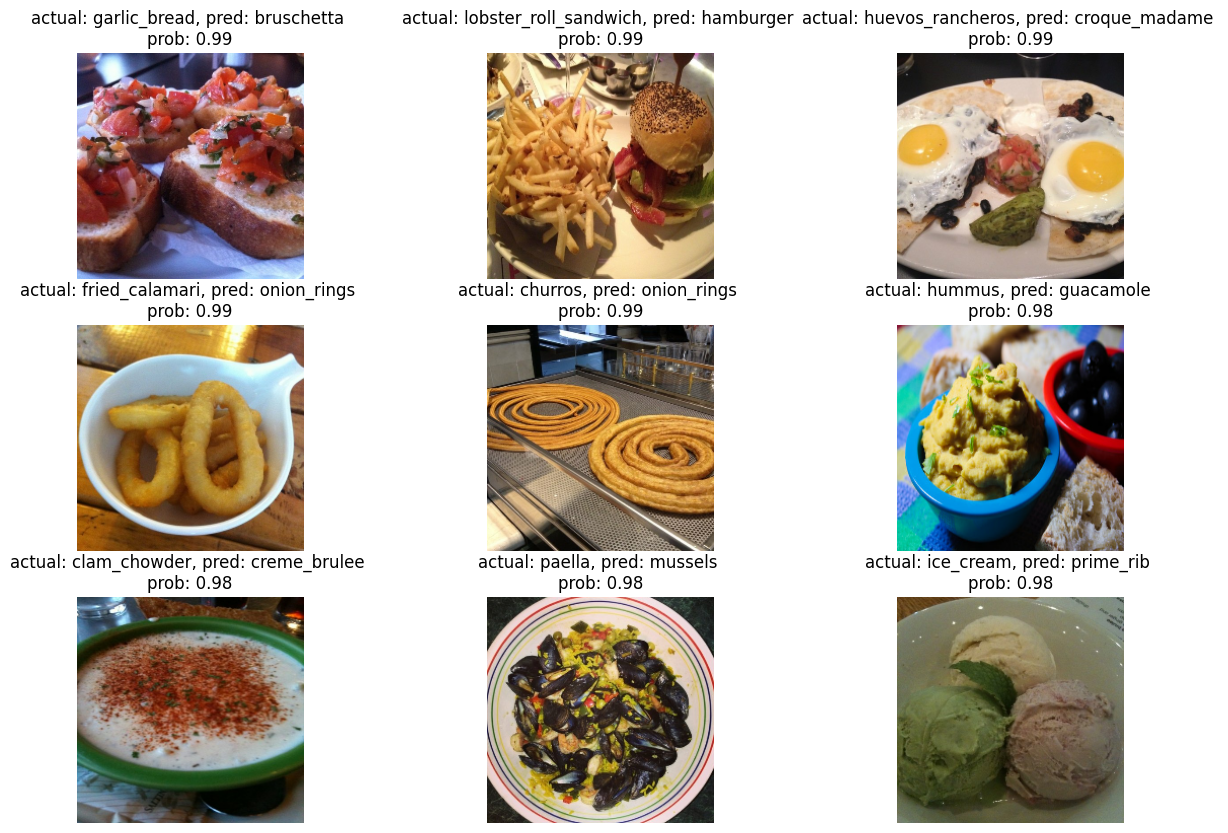

In [78]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

Going through the model's most wrong predictions can usually help figure out a couple of things:
* **Some of the labels might be wrong** - If our model ends up being good enough, it may actually learning to predict very well on certain classes. This means some images which the model predicts the right label may show up as wrong if the ground truth label is wrong. If this is the case, we can often use our model to help us improve the labels in our dataset(s) and in turn, potentially making future models better. This process of using the model to help improve labels is often referred to as [**active learning**](https://blog.scaleway.com/active-learning-some-datapoints-are-more-equal-than-others/).
* **Could more samples be collected?** - If there's a recurring pattern for a certain class being poorly predicted on, perhaps it's a good idea to collect more samples of that particular class in different scenarios to improve further models.



---

